# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


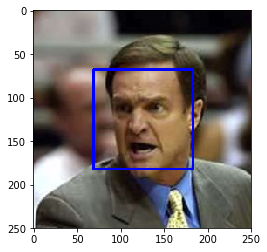

In [0]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #cv2.circle(img,(x+(w//2),y+(h//2)),(w//2),(0,255,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
* Percentage of detecting a human face in first 100 images in `human_files` is 100%
* Percentage of detecting a human face in first 100 images in `dog_files` is 8%

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_human_face_count = 0
dog_files_human_face_count=0

for i in human_files_short:
    if face_detector(i):
        human_files_human_face_count+=1
for i in dog_files_short:
    if face_detector(i):
        dog_files_human_face_count+=1

print('percentage of detecting human face on human_files_short is :',(human_files_human_face_count),'%') #As they are 100 in count so we are not dividing with 100
print('percentage of detecting human face on dog_files_short is :',(dog_files_human_face_count),'%')

percentage of detecting human face on human_files_short is : 100 %
percentage of detecting human face on dog_files_short is : 8 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print('running on GPU')
else:
    print('no GPU')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:26, 20882131.76it/s]


running on GPU


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    Transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])
    
    im = Image.open(img_path)
    
    if use_cuda:
        im= Transforms(im).unsqueeze(0).cuda()
    else:
        im= Transforms(im).unsqueeze(0)
    output = VGG16(im)
    _, predicted = output.topk(1)
    
    
    return predicted.item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    
    return (VGG16_predict(img_path) in range(151,269)) # true/false

In [0]:
dog_detector('dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg')

True

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
* Percentage of detecting a dog in `human_files_short` is 0%
* Percentage of detecting a dog in `dog_files_short` is 97%

In [0]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs_count_in_human_files_short = 0
dogs_count_in_dog_files_short = 0
for i in human_files_short:
    if dog_detector(i):
        dogs_count_in_human_files_short+=1
for i in dog_files_short:
    if dog_detector(i):
        dogs_count_in_dog_files_short+=1
        
print('Percentage of dogs detected in human_files_short is {}%'.format(dogs_count_in_human_files_short))
print('Percentage of dogs detected in dog_files_short is {}%'.format(dogs_count_in_dog_files_short))

Percentage of dogs detected in human_files_short is 0%
Percentage of dogs detected in dog_files_short is 97%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import torch
import numpy as np

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print('running on GPU')
else:
    print('no GPU')

running on GPU


In [0]:
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 1000
shuffle = True
num_workers = 1
test = 'dogImages/test'
train = 'dogImages/train'
valid = 'dogImages/valid'

train_transforms = transforms.Compose([
    #transforms.ColorJitter(.2,.2,.2,.2),
    #transforms.RandomAffine(30,(0.3,0.5),(0.8,1.0),25),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size = 224,scale=(.8,1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), 
])


test_transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])

valid_transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])
    


trainFolder = ImageFolder(train,transform=train_transforms)
testFolder = ImageFolder(test,transform=test_transforms)
validFolder = ImageFolder(valid,transform=valid_transforms,)

train_loader = DataLoader(trainFolder,  batch_size = batch_size, shuffle = shuffle, num_workers = num_workers)

valid_loader = DataLoader(validFolder,batch_size = batch_size, shuffle = shuffle, num_workers = num_workers)

test_loader = DataLoader(testFolder,batch_size = batch_size, num_workers = num_workers)

loaders_scratch = {'train':train_loader,'valid':valid_loader, 'test':test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

***For training***: 
* For resizing the images I used `RandomResizedCrop` functions which crops the given images into a scale of 0.8 to 1.0 of the original image size and with a random aspect ratio and finally it resizes to the given size of 224px.
* I choosed 224px as the size for the imput tensor as it is most widely used for imagenet models and I can also use the same for Step4.

* Yes, I augmented the data. I Used Horizontal Flips, Rotating Image, Vertical Flips randomly thoughout the training data to achive more generalisation. I also thought of using ColorJitter, RandomAffine for augmentation. But, the results during training are not upto the mark. I thought the reasons in most of the cases the color of the dog is also an important characteristic on classifying the breed. So, I dropped from using them.

***For Testing and Validating***:
* I simply resized to 230px and then cropped to 224px

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1  = nn.Conv2d(3,20,3, padding=1, stride=2) 
        self.conv2  = nn.Conv2d(20,80,3, padding=1, stride=2) 
        self.conv3  = nn.Conv2d(80,160,3, padding=1, stride=2) 
        self.pool = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(7*7*160,1000)
        self.fc2 = nn.Linear(1000,133)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = x.view(-1,7*7*160)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [0]:
model_scratch

Net(
  (conv1): Conv2d(3, 20, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(20, 80, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=7840, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=133, bias=True)
  (dropout): Dropout(p=0.2)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  


__Answer:__ 

I tried out a lot of architectures for  which are very complex and I thought the complexity adds extra advantage. But, that didn't worked for me. Then I tried with this simple architecture which helped me to pass the test.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.1, momentum=0.9)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        count = 0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            print(batch_idx,end='\r')
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            if batch_idx % 100 == 0:
                print('epoch {} Batch {} train_loss:{}'.format(epoch, batch_idx, train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # mo  ve to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss =valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased as ({:.5f} --> {:.5f}). Saving the model.....'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt' )

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

epoch 1 Batch 0 train_loss:4.8900580406188965
Epoch: 1 	Training Loss: 4.888108 	Validation Loss: 4.880730
Validation loss decreased as (inf --> 4.88073). Saving the model.....
epoch 2 Batch 0 train_loss:4.883317947387695
Epoch: 2 	Training Loss: 4.869529 	Validation Loss: 4.854506
Validation loss decreased as (4.88073 --> 4.85451). Saving the model.....
epoch 3 Batch 0 train_loss:4.84517765045166
Epoch: 3 	Training Loss: 4.839574 	Validation Loss: 4.808990
Validation loss decreased as (4.85451 --> 4.80899). Saving the model.....
epoch 4 Batch 0 train_loss:4.809587478637695
Epoch: 4 	Training Loss: 4.762230 	Validation Loss: 4.723805
Validation loss decreased as (4.80899 --> 4.72380). Saving the model.....
epoch 5 Batch 0 train_loss:4.697290897369385
Epoch: 5 	Training Loss: 4.678167 	Validation Loss: 4.675176
Validation loss decreased as (4.72380 --> 4.67518). Saving the model.....
epoch 6 Batch 0 train_loss:4.628567218780518
Epoch: 6 	Training Loss: 4.614598 	Validation Loss: 4.65632

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.091395


Test Accuracy: 11% (93/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
## TODO: Specify data loaders
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 30
shuffle = True
num_workers = 1
test = 'dogImages/test'
train = 'dogImages/train'
valid = 'dogImages/valid'

train_transforms = transforms.Compose([
    #transforms.ColorJitter(.2,.2,.2,.2),
    #transforms.RandomAffine(30,(0.3,0.5),(0.8,1.0),25),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size = 224,scale=(.8,1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]), 
])


test_transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])

valid_transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])
    


trainFolder = ImageFolder(train,transform=train_transforms)
testFolder = ImageFolder(test,transform=test_transforms)
validFolder = ImageFolder(valid,transform=valid_transforms,)

train_loader = DataLoader(trainFolder,  batch_size = batch_size, shuffle = shuffle, num_workers = num_workers)

valid_loader = DataLoader(validFolder,batch_size = batch_size, shuffle = shuffle, num_workers = num_workers)

test_loader = DataLoader(testFolder,batch_size = batch_size, num_workers = num_workers)

loaders_transfer = {'train':train_loader,'valid':valid_loader, 'test':test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet152(pretrained=True)

for param in model_transfer.parameters():
    param.required_grad = False
    
    
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:

n_inputs = model_transfer.fc.in_features

last_layer = nn.Linear(n_inputs, 133)

model_transfer.fc = last_layer

if use_cuda:
    model_transfer = model_transfer.cuda()
    
for param in model_transfer.fc.parameters():
    param.required_grad = True
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

As I started learning about different models at `torchvision.model` Resnet151 attracted me a lot, and also having smallest error values is another reason I have taken it and gave it a try.I didn't trained convnets and they worked great as a feature extractor for me. I modified the `fc` part and trained only this part.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.1, momentum=0.9)


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
# train the model
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

epoch 1 Batch 0 train_loss:5.04184627532959
epoch 1 Batch 100 train_loss:9.169527053833008
epoch 1 Batch 200 train_loss:8.263672828674316
Epoch: 1 	Training Loss: 8.124673 	Validation Loss: 2.892332
Validation loss decreased as (inf --> 2.89233). Saving the model.....
epoch 2 Batch 0 train_loss:5.603992938995361
epoch 2 Batch 100 train_loss:6.17422342300415
epoch 2 Batch 200 train_loss:6.194755554199219
Epoch: 2 	Training Loss: 6.184981 	Validation Loss: 3.153070
epoch 3 Batch 0 train_loss:5.426285266876221
epoch 3 Batch 100 train_loss:5.791879653930664
epoch 3 Batch 200 train_loss:5.897218704223633
Epoch: 3 	Training Loss: 5.985206 	Validation Loss: 3.379093
epoch 4 Batch 0 train_loss:8.026424407958984
epoch 4 Batch 100 train_loss:4.76127290725708
epoch 4 Batch 200 train_loss:5.068147659301758
Epoch: 4 	Training Loss: 5.121434 	Validation Loss: 2.730603
Validation loss decreased as (2.89233 --> 2.73060). Saving the model.....
epoch 5 Batch 0 train_loss:4.57133150100708
epoch 5 Batch 1

In [0]:
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.01, momentum=0.9)
model_transfer =  train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

epoch 1 Batch 0 train_loss:4.850099563598633
epoch 1 Batch 100 train_loss:2.142082929611206
epoch 1 Batch 200 train_loss:1.8705724477767944
Epoch: 1 	Training Loss: 1.853551 	Validation Loss: 1.201980
Validation loss decreased as (inf --> 1.20198). Saving the model.....
epoch 2 Batch 0 train_loss:1.0897629261016846
epoch 2 Batch 100 train_loss:1.628852367401123
epoch 2 Batch 200 train_loss:1.5096782445907593
Epoch: 2 	Training Loss: 1.524464 	Validation Loss: 1.220179
epoch 3 Batch 0 train_loss:1.4863775968551636
epoch 3 Batch 100 train_loss:1.4066424369812012
epoch 3 Batch 200 train_loss:1.3955609798431396
Epoch: 3 	Training Loss: 1.407884 	Validation Loss: 1.110314
Validation loss decreased as (1.20198 --> 1.11031). Saving the model.....
epoch 4 Batch 0 train_loss:1.9184410572052002
epoch 4 Batch 100 train_loss:1.4663655757904053
epoch 4 Batch 200 train_loss:1.4143660068511963
Epoch: 4 	Training Loss: 1.407589 	Validation Loss: 1.080213
Validation loss decreased as (1.11031 --> 1.080

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.298350


Test Accuracy: 85% (714/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
#ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from torchvision import transforms
use_cuda = torch.cuda.is_available()

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    img = Image.open(img_path)
    
    Transforms = transforms.Compose([
        transforms.Resize(230),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    ])
    
    
    if use_cuda:
        img= Transforms(img).unsqueeze(0).cuda()
    else:
        img= Transforms(img).unsqueeze(0)
    output = model_transfer(img)
    _, predicted = output.topk(1)
    
    
    res = predicted.item() 
    return class_names[res] 

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
    if dog_detector(img_path):
        print('🐶 Dog detected 🐶')
        print('The dog breed is ',predict_breed_transfer(img_path))
    elif face_detector(img_path):
        print('☺ Human face detected ☺')
        print('your face seems to be the face ',predict_breed_transfer(img_path),' dog breed')
        
    else:
        print('Error: No Dog or Human detected')
    ## handle cases for a human face, dog, and neither


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Yes, The output i received in case of dog breed classification is better than what is expected. 

where as coming to the points for improvement
1. More diverse set of images of dogs in multiple angles may help us in coming up with a better model.
2. I think a full training of the pretrained network with a large data helps us to come up with a better model.
3. I could have used a more deeper neural network in model_scratch and might have runned it for more number of epochs to achive a better accuracy.
4. More augmentation may help us achiving good results.

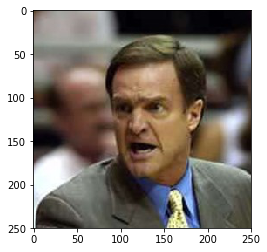

☺ Human face detected ☺
your face seems to be the face  Silky terrier  dog breed


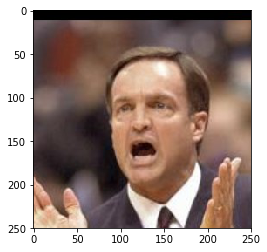

☺ Human face detected ☺
your face seems to be the face  Ibizan hound  dog breed


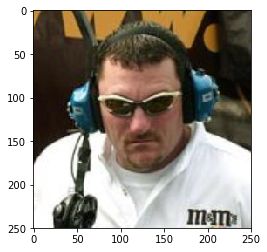

☺ Human face detected ☺
your face seems to be the face  American water spaniel  dog breed


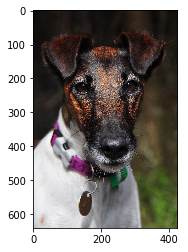

🐶 Dog detected 🐶
The dog breed is  Smooth fox terrier


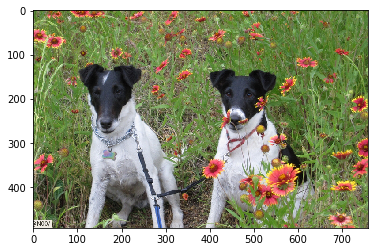

🐶 Dog detected 🐶
The dog breed is  Smooth fox terrier


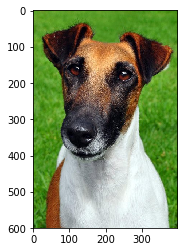

🐶 Dog detected 🐶
The dog breed is  Smooth fox terrier


In [0]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

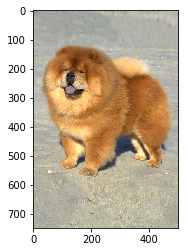

🐶 Dog detected 🐶
The dog breed is  Chow chow


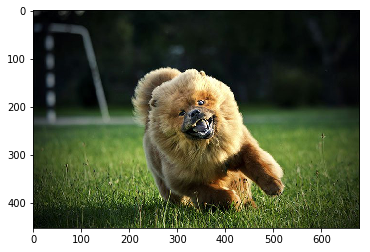

🐶 Dog detected 🐶
The dog breed is  Chow chow


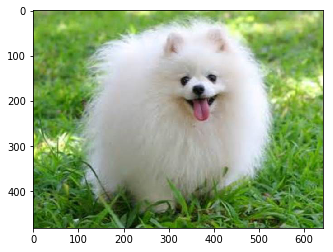

🐶 Dog detected 🐶
The dog breed is  Pomeranian


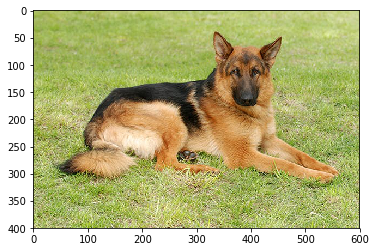

🐶 Dog detected 🐶
The dog breed is  German shepherd dog


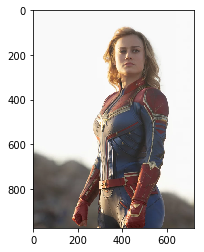

☺ Human face detected ☺
your face seems to be the face  Irish setter  dog breed


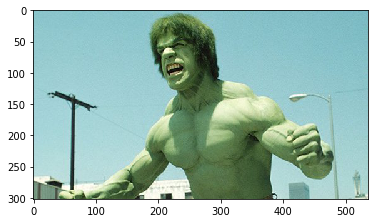

Error: No Dog or Human detected


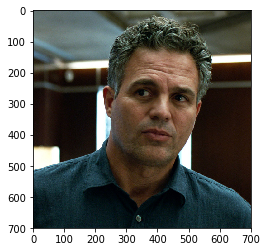

☺ Human face detected ☺
your face seems to be the face  Silky terrier  dog breed


In [0]:
run_app('Chow-Chow.jpg')
run_app('Chow-Chow1.jpg')
run_app('Pomeranian.jpg')
run_app('german-shepherd.jpg')
run_app('captain.webp')
run_app('hulk.jpg')
run_app('mark.jpg')